# Praca Domowa nr 1

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import requests
import warnings
from pandas import json_normalize 

warnings.filterwarnings('ignore')

## Wczytanie ramki

In [3]:
df=requests.get("https://api.apispreadsheets.com/api/dataset/forest-fires/").json()
df = json_normalize(df, 'data')

## Wyświetlenie kilku pierwszych rekordów

In [4]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51.0,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33.0,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33.0,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97.0,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99.0,1.8,0.0,0.0


## Wyświetlenie informacji na temat kolumn ramki

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X       517 non-null    int64  
 1   Y       517 non-null    int64  
 2   month   517 non-null    object 
 3   day     517 non-null    object 
 4   FFMC    517 non-null    float64
 5   DMC     517 non-null    float64
 6   DC      517 non-null    float64
 7   ISI     517 non-null    float64
 8   temp    517 non-null    float64
 9   RH      517 non-null    float64
 10  wind    517 non-null    float64
 11  rain    517 non-null    float64
 12  area    517 non-null    float64
dtypes: float64(9), int64(2), object(2)
memory usage: 52.6+ KB


In [6]:
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


## Wyświetlenie rozkładów poszczególnych kolumn

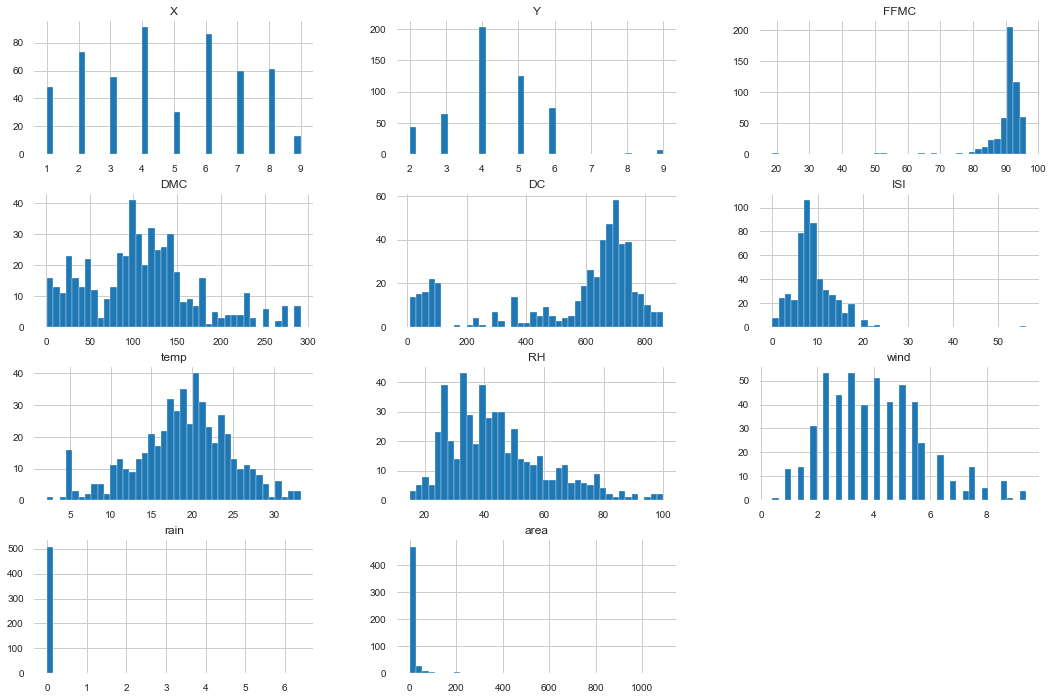

In [7]:
df.hist(figsize=(18, 12), bins=40)
plt.show()

## Korelacje ze zmienną area

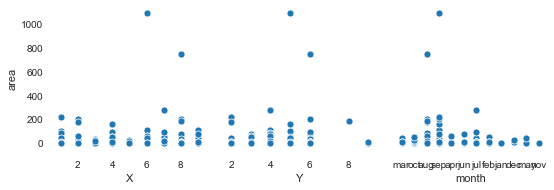

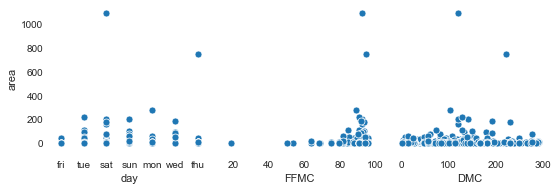

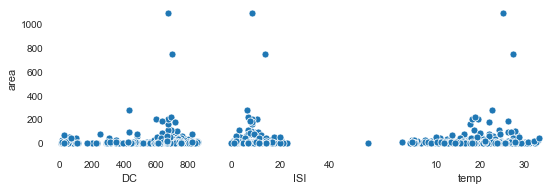

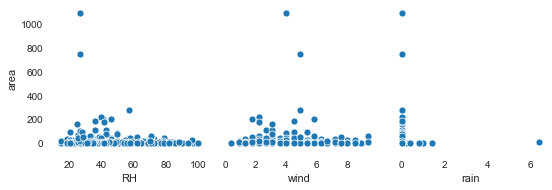

In [8]:
sns.pairplot(df, y_vars="area", x_vars=df.columns.values[:3])
sns.pairplot(df, y_vars="area", x_vars=df.columns.values[3:6])
sns.pairplot(df, y_vars="area", x_vars=df.columns.values[6:9])
sns.pairplot(df, y_vars="area", x_vars=df.columns.values[9:12])

plt.show()

## Zależność ilości pożarów od miesiąca oraz dnia tygodnia

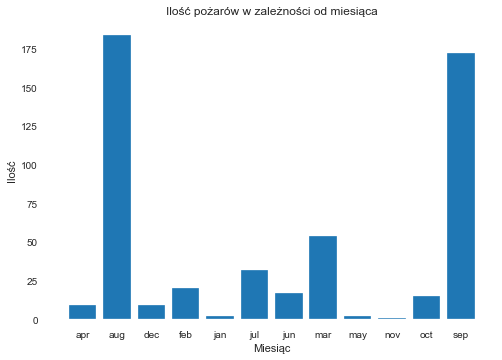

In [9]:
x=df.groupby(["month"]).size().reset_index()
plt.bar(x["month"],x.iloc[:,1])
plt.title("Ilość pożarów w zależności od miesiąca")
plt.xlabel('Miesiąc')
plt.ylabel('Ilość')
plt.show()

Z wykresu wynika, że najwięcej pożarów występuje pod koniec lata w miesiącach sierpień oraz wrzesień.

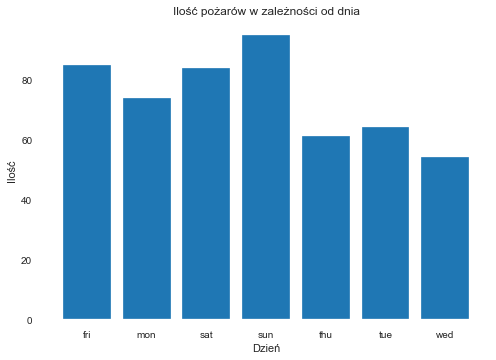

In [10]:
x=df.groupby(["day"]).size().reset_index()
plt.bar(x["day"],x.iloc[:,1])
plt.title("Ilość pożarów w zależności od dnia")
plt.xlabel('Dzień')
plt.ylabel('Ilość')
plt.show()

Z tego wykresu możemy wnioskować, że dzień tygodnia nie ma dużego znaczenia na ilość pożarów. Delikatna przewaga dni weekendowych.

## Średnia powierzchnia pożarów w zależnośći od temperatury po usunięciu wartości odstających

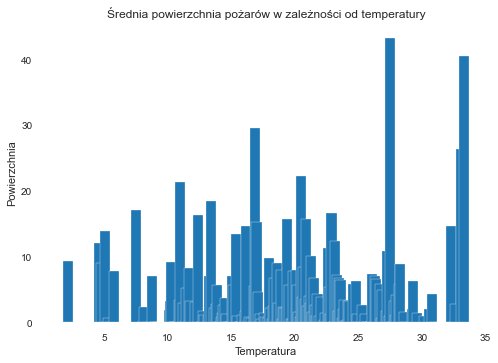

In [11]:
quantile = df.area.quantile(.95)
df1 = df[df["area"] < df.area.quantile(0.95)]
df1

x=df1.groupby(["temp"])['area'].aggregate('mean').reset_index()
plt.bar(x["temp"],x.iloc[:,1])
plt.title("Średnia powierzchnia pożarów w zależności od temperatury")
plt.xlabel('Temperatura')
plt.ylabel('Powierzchnia')
plt.show()


## Średnia powierzchnia pożarów w zależnośći od położenia po usunięciu 5% wartości największych

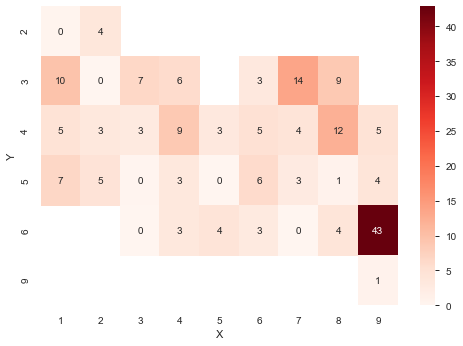

In [12]:
x = df1.groupby(['Y','X']).mean().reset_index()
sns.heatmap(x.pivot("Y","X","area"),cmap="Reds",annot=True,fmt=".0f")
plt.show()

## Ilość pożarów w zależnośći od położenia po usunięciu 5% wartości największych

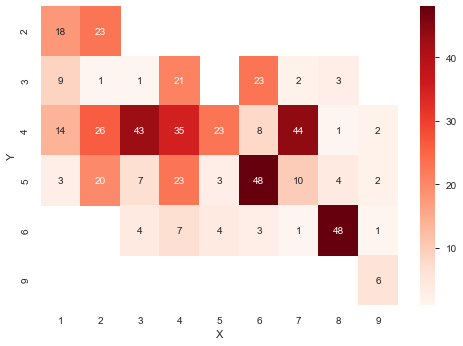

In [13]:
x = df1.groupby(['Y','X']).count().reset_index()
sns.heatmap(x.pivot("Y","X","area"),cmap="Reds",annot=True,fmt=".0f")
plt.show()

Z dwóch ostatnich wykresów można wniskować, iż średnia powierzchnia pożarów na danym terenie jest odwrotnie proporcjonalna do ilości ich wystąpień.

## Boxplot dla zmiennej area po usunięciu 5% wartości największych oraz takich w których area wynosi 0

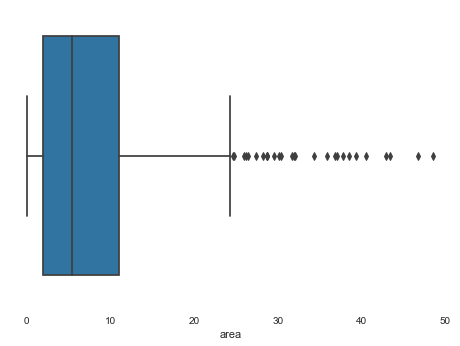

In [14]:
sns.boxplot(df1[df1["area"]!=0]["area"])
plt.show()

## Rozkład zmiennej area po usunięciu 5% wartości największych oraz takich w których area wynosi 0 

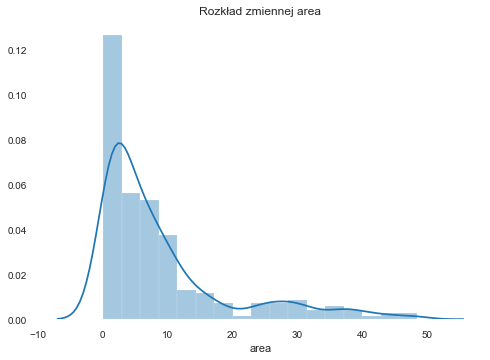

In [16]:
a=sns.distplot(df1[df1["area"]!=0]["area"])
a.set_title('Rozkład zmiennej area')
plt.show()

In [20]:
from pandas_profiling import ProfileReport
prof = ProfileReport(df)
prof.to_file(output_file='output.html')

Summarize dataset:   0%|          | 0/25 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Automatyczny raport stworzony przy pomocy pakiety pandas_profiling jest przede wszystkim bardzo wygodny. Jednak eksplorując dane samodzielnie można być bardziej elastycznym i wgłebić się w zależność, która interesuje nas najbardziej. Dodatkowym minusem może byc czas generowania raportu, który przy zaledwie 500 rekordach trwa okolo 30 sekund.